# Introduction

This project explores Spotify Songs dataset, analyzing audio features and popularity metrics to understand what resonates with listeners globally. It includes features like danceability, energy, and tempo, and metrics such as chart duration and streaming counts, offering insights into factors contributing to a song. 

## Project Goals

* **Analytical Insights:** Examine distributions and correlations between audio features and popularity to identify patterns and trends.
* **Predictive Modeling:** Use machine learning to forecast song genre based on audio characteristics, benefiting artists and industry stakeholders.
* **Feature Importance:** Determine which audio features significantly influence song genre, providing insights into music trends and listener preferences.


# Data

In this part we will analyze and get a bit more insights about the data to understand the relation between the variables. 

In [8]:
df.shape

(114000, 21)

## Infos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Dataset/dataset.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [2]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [3]:
df.shape

(114000, 21)

## Data Information and Cleaning

**Initial Observations:**

*   The dataset contains 21 columns, including information about the track (e.g., `track_id`, `track_name`), the artist, album, and various audio features like `danceability`, `energy`, `tempo`, and more.
*   The target variable for prediction is `track_genre`.

**Column Details:**

*   **track\_id:** Unique identifier for each track.
*   **artists:** Name(s) of the artist(s).
*   **album\_name:** Name of the album.
*   **track\_name:** Name of the track.
*   **popularity:** Popularity score of the track.
*   **duration\_ms:** Duration of the track in milliseconds.
*   **explicit:** Whether the track has explicit content.
*   **danceability:** Danceability score of the track.
*   **energy:** Energy score of the track.
*   **key:** Key in which the track is composed.
*   **loudness:** Loudness of the track.
*   **mode:** Mode of the track (major or minor).
*   **speechiness:** Speechiness score of the track.
*   **acousticness:** Acousticness score of the track.
*   **instrumentalness:** Instrumentalness score of the track.
*   **liveness:** Liveness score of the track.
*   **valence:** Valence score of the track.
*   **tempo:** Tempo of the track.
*   **time\_signature:** Time signature of the track.
_____
*   **track\_genre:** Genre of the track (target variable)

## Data Cleaning

### NAs

In [4]:
# Calculate missing values
missing_values = df.isnull().sum()

# Filter missing values to show only where the count is greater than zero
missing_values_filtered = missing_values[missing_values > 0]

# Display missing values if there are any
if not missing_values_filtered.empty:
    display(missing_values_filtered.to_frame())
else:
    print("Aucune valeur manquante dans les données.")

,0
artists,1
album_name,1
track_name,1


### Duplicate values 
There are **40,900** entries in the dataset that have duplicate `track_id` values, indicating multiple records for certain tracks. I will try to understand what are those duplicates by inspecting a bit further.

In [5]:
# Count total number of duplicated track_ids in the original dataset
total_duplicates = df['track_id'].duplicated(keep=False).sum()
total_duplicates

40900

### Duplicate Track ID 
There are **40,900** entries in the dataset that have duplicate `track_id` values, indicating multiple records for certain tracks. I will try to understand what are those duplicates by inspecting a bit further.

In [6]:
# Extracting sample duplicated track_id entries for clearer visualization in tabular format
duplicate_track_id_display = df[df['track_id'].duplicated(keep=False)].sort_values('track_id').head(7).loc[
    :, ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'track_genre']
]
duplicate_track_id_display

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,track_genre
15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,chill
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,soul
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,punk-rock
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,ska
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,rock
3257,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,alternative
2106,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,alt-rock


In this initial scenario of duplicates, it's evident that the same song can appear multiple times under different genres. Since a song can be classified under more than one genre, it seems prudent to retain these entries for further analysis. This approach will allow for a more comprehensive understanding of the song's genre diversity and its implications.

### Duplicate Track, different track_ID, but same track name and artist

Given that the same song appears multiple times in our data, it's possible to encounter the same artist and song listed under different album names. Since this information is redundant, we will remove any duplicate entries.

In [5]:
# Group by 'track_name' and 'artists' and identify different track IDs for the same song and artist combination
same_song_different_ids = df.groupby(['track_name', 'artists'])['track_id'].nunique()
same_song_different_ids = same_song_different_ids[same_song_different_ids > 1]

# Display the results
slt = same_song_different_ids.head(10)  # Display the first 10 results for clarity
cv = same_song_different_ids.count()
slt

track_name                                                  artists                       
"Was He Slow?" - Music From The Motion Picture Baby Driver  Kid Koala                         2
'Til You Can't                                              Cody Johnson                      6
'Zat You, Santa Claus? - Single Version                     Louis Armstrong;The Commanders    6
(......醉鬼阿Q)(feat. 孫燕姿)                                     吳青峰;Stefanie Sun                  2
(Because) It's Christmastime                                Chicago                           2
(Everything I Do) I Do It For You                           Bryan Adams                       2
(I Can't Get No) Satisfaction - Mono Version                The Rolling Stones                2
(I Heard That) Lonesome Whistle - Single Version            Hank Williams;Drifting Cowboys    2
(I Just) Died In Your Arms                                  Cutting Crew                      3
(We're Not) The Jet Set                      

In [6]:
# Filter the dataset to show details for the song "'Til You Can't" by Cody Johnson
til_you_cant_details = df[df['track_name'] == "'Til You Can't"]
til_you_cant_details.head(6)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
19077,19077,02HqnDssYA62iGapkpJIkJ,Cody Johnson,Country Car Hits,'Til You Can't,1,224213,False,0.501,0.815,...,-4.865,1,0.0436,0.0513,0.0,0.106,0.46,160.087,4,country
19083,19083,0mTSm4MqhfSwCwDnQqABKk,Cody Johnson,Country Road Songs,'Til You Can't,1,224213,False,0.501,0.815,...,-4.865,1,0.0436,0.0513,0.0,0.106,0.46,160.087,4,country
19092,19092,5huByJCSYO88ozJcs4p8co,Cody Johnson,Never Leave - Country Magic,'Til You Can't,0,224213,False,0.501,0.815,...,-4.865,1,0.0436,0.0513,0.0,0.106,0.46,160.087,4,country
19094,19094,7CzUkV2dSe5WwM4apgSIhK,Cody Johnson,New Country Hits,'Til You Can't,0,224213,False,0.501,0.815,...,-4.865,1,0.0436,0.0513,0.0,0.106,0.46,160.087,4,country
19097,19097,2JerUEDYblFmPzZjLs4a1z,Cody Johnson,Single Saturday Night - Country Songs,'Til You Can't,0,224213,False,0.501,0.815,...,-4.865,1,0.0436,0.0513,0.0,0.106,0.46,160.087,4,country
19099,19099,2eDNes32ixF4zZnBcRgIAw,Cody Johnson,Burn Burn Burn - Hot Country Hits,'Til You Can't,0,224213,False,0.501,0.815,...,-4.865,1,0.0436,0.0513,0.0,0.106,0.46,160.087,4,country


In [7]:
# Drop duplicates based on 'track_name', 'artists', and 'track_genre'
# Keep only the first occurrence of each combination
cd = df.drop_duplicates(subset=['track_name', 'artists', 'track_genre'], keep='first')

# Check the shape of the data after dropping duplicates to see how many entries are left
print(cd.shape)

(100210, 21)


In [8]:
til_you_cant_details = cd[cd['track_name'] == "'Til You Can't"]
til_you_cant_details.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
19077,19077,02HqnDssYA62iGapkpJIkJ,Cody Johnson,Country Car Hits,'Til You Can't,1,224213,False,0.501,0.815,...,-4.865,1,0.0436,0.0513,0.0,0.106,0.46,160.087,4,country


In [9]:
# Identify cases where 'track_id' and 'track_genre' are duplicated
duplicates_by_id_and_genre = cd[cd.duplicated(['track_id', 'track_genre'], keep=False)]

# Sort the duplicates by 'track_id' and 'track_name'
sorted_duplicates = duplicates_by_id_and_genre.sort_values(by=['track_id'])

duplicates_by_id_and_genre.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


### Data Cleaning Conclusions
After a thorough examination of the dataset, I proceeded to specifically identify duplicate instances of `track_id` and investigated whether these duplicates were associated with the same or different `track_genre`. This analysis revealed that the remaining duplicates, those with the same `track_id` but listed under different genres, indeed represent tracks that are categorized into multiple genres. The presence of such entries is indicative of the genre's fluidity or the track's broad appeal across different musical styles.

*   **Total entries**: 100'210 (down from the original 114,000)
*   **Data Columns**: 21
*   **Non-Null Count per column**: All columns have close to the full count of 100'210.

In [10]:
# Compute summary statistics of the data
data_statistics = cd.describe()

# Display the statistics
display(data_statistics)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,100210.000000,100210.000000,1.002100e+05,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000,100210.000000
mean,56816.157729,35.616116,2.308395e+05,0.562540,0.640941,5.301048,-8.386302,0.633749,0.086074,0.317666,0.169669,0.217318,0.465617,122.359332,3.902984
std,33059.900929,20.830198,1.106958e+05,0.174218,0.254275,3.557385,5.122329,0.481782,0.109599,0.334657,0.319828,0.195334,0.259767,29.962572,0.438937
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28194.250000,21.000000,1.754630e+05,0.451000,0.467000,2.000000,-10.183000,0.000000,0.035900,0.015200,0.000000,0.098400,0.249000,99.776000,4.000000
50%,56279.500000,37.000000,2.152380e+05,0.575000,0.684000,5.000000,-7.125000,1.000000,0.048900,0.173000,0.000070,0.133000,0.451000,122.148000,4.000000
75%,85119.750000,51.000000,2.656310e+05,0.691000,0.857000,8.000000,-5.059000,1.000000,0.085100,0.604000,0.089800,0.279000,0.674000,140.188750,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
cd.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Missing Values:**

*   There are a few missing values in `artists`, `album_name`, and `track_name` columns, which are essential for understanding the dataset. Since these are only three rows, we can drop them.

**Basic Statistics Insights:**

*   `popularity` ranges from 0 to 100, with a mean of about 33.2.
*   `duration_ms` has a wide range, indicating varied track lengths.
*   `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, and `tempo` all have diverse values, which will be useful in the analysis.
*   `track_genre` has 114 unique genres, with the most frequent genre appearing 1000 times.

Let's proceed with cleaning the data by removing the rows with missing values and the unnecessary 'Unnamed: 0' column.

In [12]:
# Drop rows with missing values
cd = cd.dropna(subset=['artists', 'album_name', 'track_name'])

# Drop the unnecessary 'Unnamed: 0' column
cd = cd.drop(columns=['Unnamed: 0'])

cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100209 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          100209 non-null  object 
 1   artists           100209 non-null  object 
 2   album_name        100209 non-null  object 
 3   track_name        100209 non-null  object 
 4   popularity        100209 non-null  int64  
 5   duration_ms       100209 non-null  int64  
 6   explicit          100209 non-null  bool   
 7   danceability      100209 non-null  float64
 8   energy            100209 non-null  float64
 9   key               100209 non-null  int64  
 10  loudness          100209 non-null  float64
 11  mode              100209 non-null  int64  
 12  speechiness       100209 non-null  float64
 13  acousticness      100209 non-null  float64
 14  instrumentalness  100209 non-null  float64
 15  liveness          100209 non-null  float64
 16  valence           100209 

In [13]:
cd.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# EDA: Exploratory Data Analysis 

This section will go deep into the data to understand interaction among variables. It combines both univariate and bivariate analyses in completing preliminary work before proceeding to work with models. 



## Univariate analysis 

### Numerical 

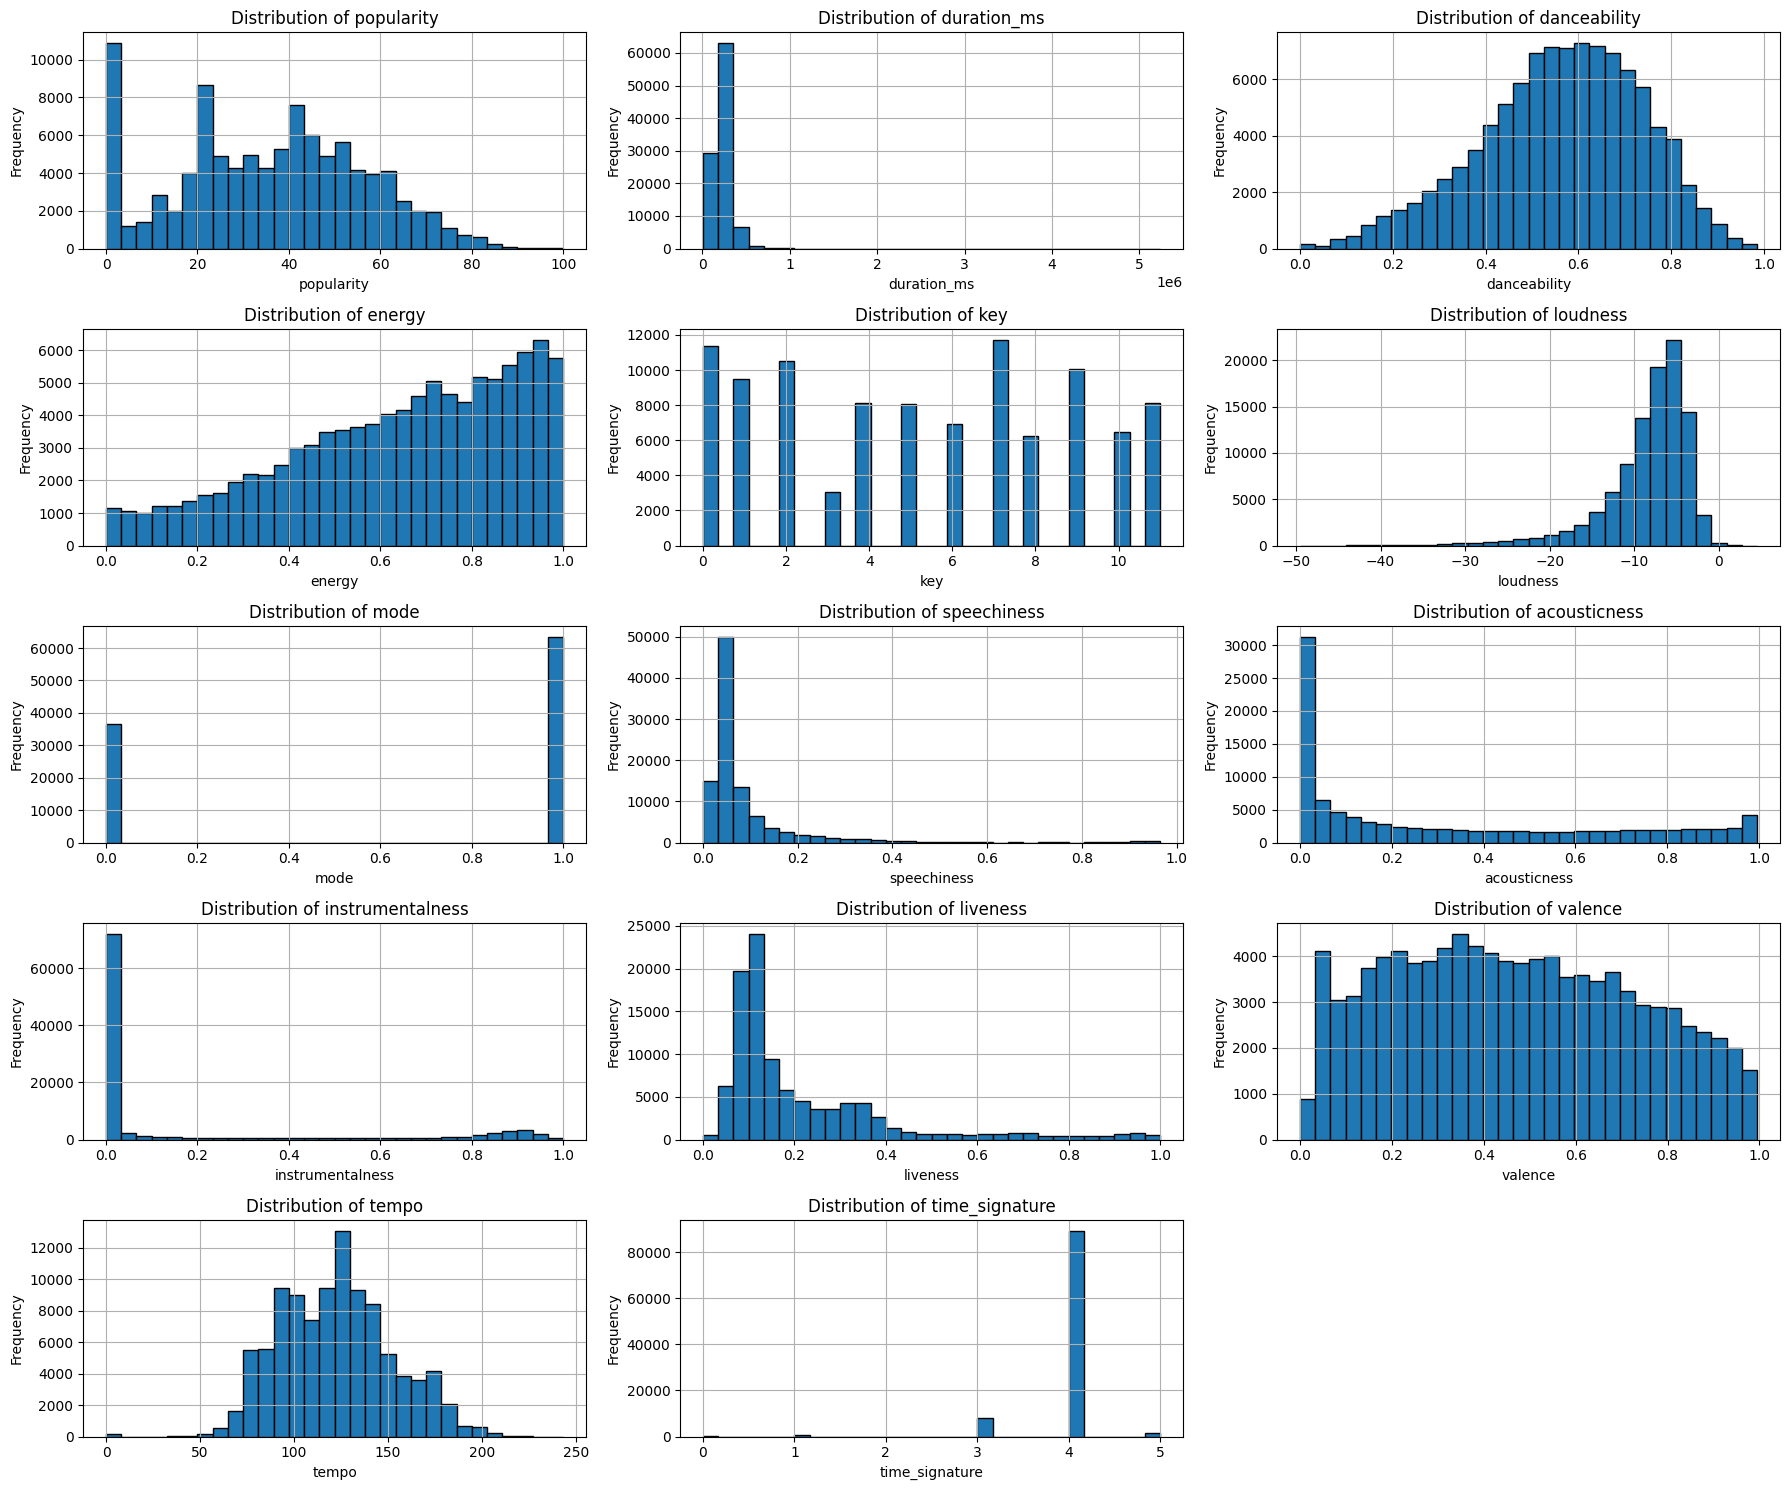

In [14]:
import matplotlib.pyplot as plt

# Set the size of the plots
plt.figure(figsize=(18, 15))

# List all numerical features
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Loop through each numerical feature and plot a histogram
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    cd[feature].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The dataset shows a diverse range of musical attributes, with the following key observations:

- **Popularity**: Skewed towards lower scores, indicating most songs are not highly popular.
- **Duration**: Most songs are around 3 to 6.5 minutes.
- **Danceability & Energy**: Most songs are moderately danceable and energetic, with scores peaking between 0.4 to 0.8 for danceability and 0.5 to 1.0 for energy.
- **Key & Mode**: Keys are uniformly distributed, and there is a balance between major and minor modes.
- **Loudness**: Most tracks have moderate loudness, between -20 and 0 decibels.
- **Speechiness & Instrumentalness**: Low speechiness and instrumentalness suggest most songs are vocal-centric with less spoken word or instrumental-only tracks.
- **Acousticness & Liveness**: Majority of songs are not acoustic, with a moderate level of liveness.
- **Valence**: Fairly uniform distribution, indicating a mix of emotional tones.
- **Tempo**: Mostly centered around 120-130 BPM, typical of moderate-paced songs.
- **Time Signature**: Dominantly 4/4, standard in most music genres.

Overall, the dataset covers a wide variety of songs with a focus on moderately popular, energetic, and vocal tracks, with typical music structural features.

### Logical 

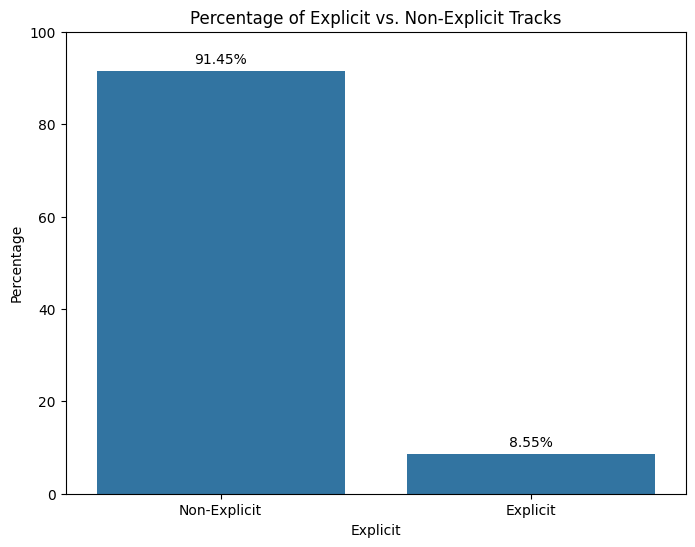

In [15]:
explicit_counts = df['explicit'].value_counts()
explicit_percentages = explicit_counts / explicit_counts.sum() * 100

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=explicit_percentages.index, y=explicit_percentages.values)
plt.title('Percentage of Explicit vs. Non-Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are displayed correctly
plt.xticks(ticks=[0, 1], labels=['Non-Explicit', 'Explicit'])  # Set x-ticks and labels
for index, value in enumerate(explicit_percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')  # Display percentage values on the bars
plt.show()

The disparity in the dataset between explicit and non-explicit tracks might result in predictive models being skewed towards classifying tracks as non-explicit. To address this imbalance, techniques such as resampling or adjusting the class weights in classification algorithms may be necessary to reduce bias and improve the model's accuracy across different classes. We will remove this feature from dataset. 

### Categorical

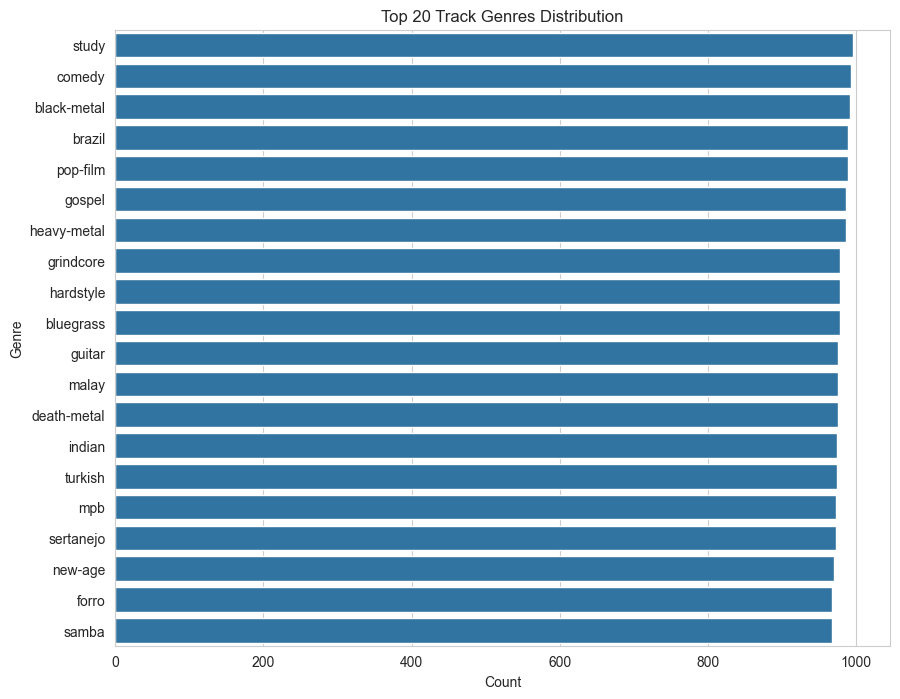

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Determine the top 20 genres by frequency
top_genres = cd['track_genre'].value_counts().nlargest(20).index

# Filter the dataframe to include only the top 20 genres
filtered_genres = cd[cd['track_genre'].isin(top_genres)]

# Count plot for top 20 track genres
plt.figure(figsize=(10, 8))
ax = sns.countplot(y="track_genre", data=filtered_genres, order=filtered_genres['track_genre'].value_counts().index)
plt.title('Top 20 Track Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

With 114 unique genres, each represented by approximatitely 1,000 songs, the dataset offers a meticulously balanced composition that showcases a diverse spectrum of musical styles.

## Bivariate analysis

We'll create a correlation matrix for the numerical features in your dataset to see how they are interrelated. This can reveal insights about potential multicollinearity and the relationships that might influence model building later on.

### Correlation Matrix

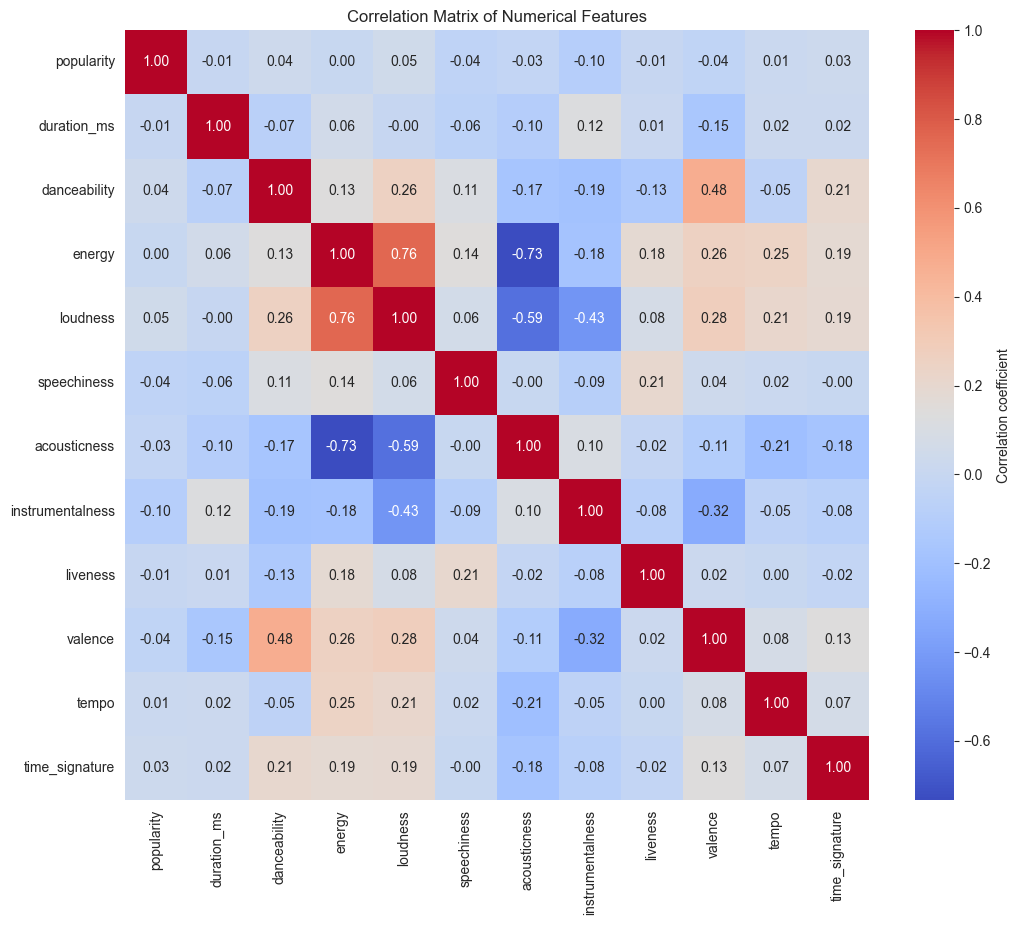

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the numerical features
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
corr_matrix = df[numerical_features].corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

1.  **Energy and Loudness**: There's a strong positive correlation **(0.76)** between energy and loudness. This suggests that tracks with higher energy levels tend to also be louder, which is expected as louder sounds are generally perceived as more energetic.
    
2.  **Acousticness and Energy**: These two features show a strong negative correlation **(-0.73)**. This indicates that tracks with higher acousticness tend to have lower energy levels. This is typical since acoustic tracks are often quieter and less intense compared to electronic or rock music, which are generally amplified and more energetic.
    
3.  **Acousticness and Loudness**: Similarly, acousticness and loudness are negatively correlated **(-0.59)**. This supports the notion that more acoustic tracks are generally quieter, aligning with the characteristics of acoustic music being softer and more natural sounding.
    
4.  **Danceability and Valence**: There is a moderate positive correlation **(0.48)** between danceability and valence. Tracks that are more danceable tend to have a higher valence, suggesting they are more likely to evoke a positive or happy mood, which is a common attribute of dance music.
    
5.  **Instrumentalness and Acousticness**: The correlation **(0.10)** here indicates a low relationship.
    
6.  **Tempo and Energy**: The correlation **(0.25)** suggests a mild positive relationship, where faster tempos might be associated with higher energy levels. This aligns with genres like electronic dance music or fast-paced rock, where both higher tempos and energy are prevalent.
    

### Insights and Implications

*   **Feature Selection for Genre Prediction**: Understanding these relationships is crucial when selecting features for machine learning models, particularly in predicting music genres. Features that are highly correlated might contribute redundant information, so it's crucial to consider these relationships to avoid multicollinearity in predictive modeling.
    





### Distribution on Track Genre

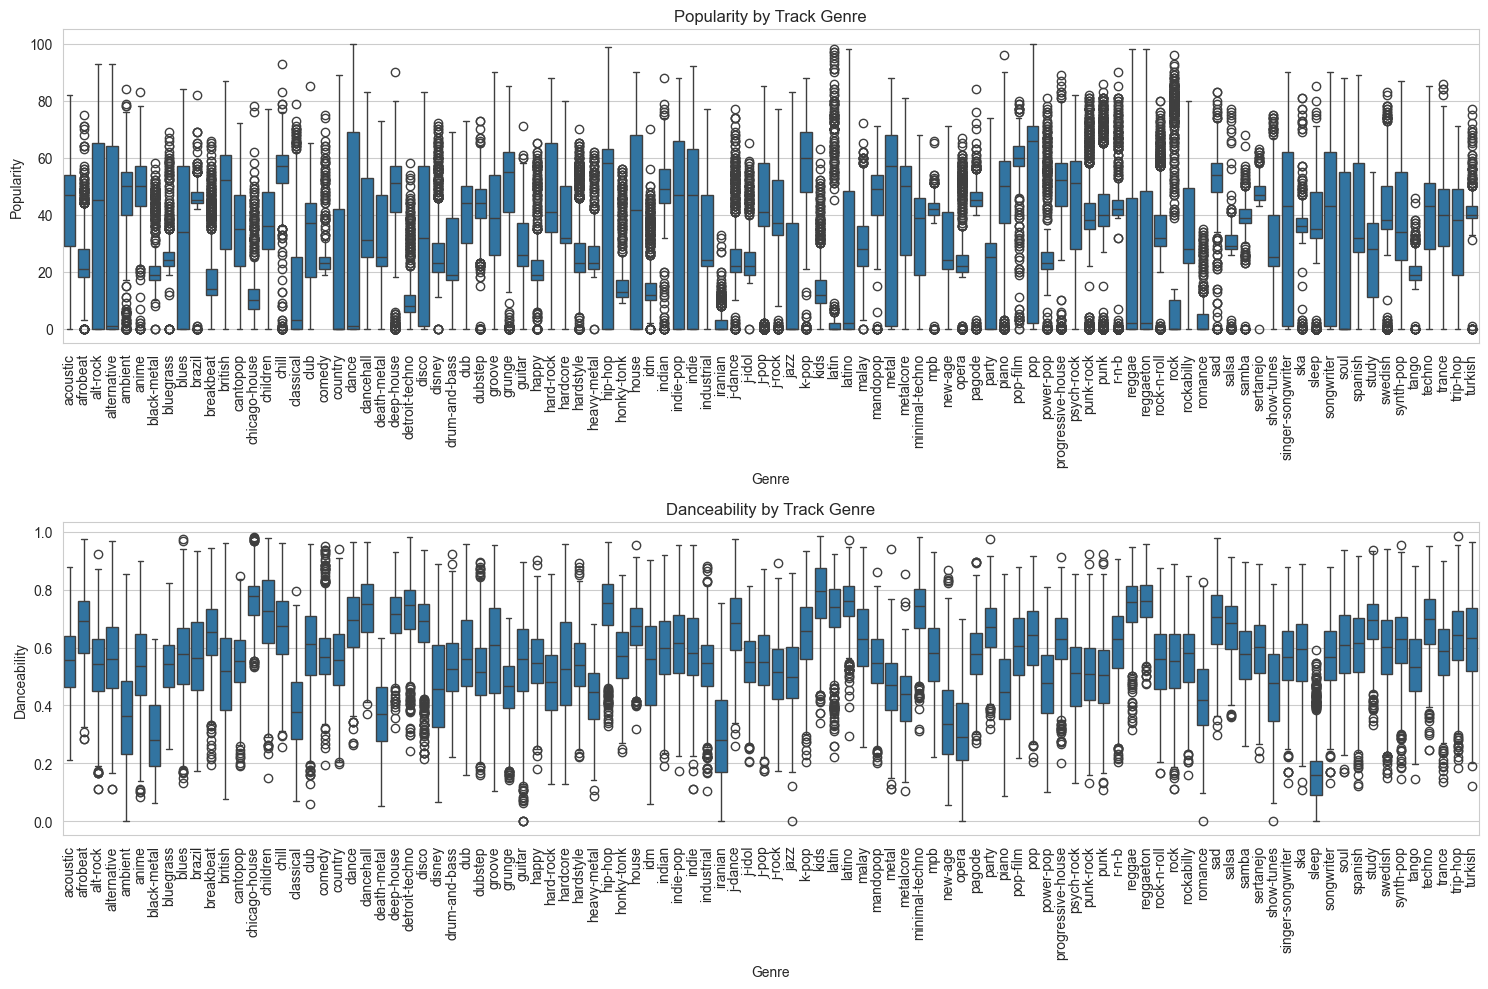

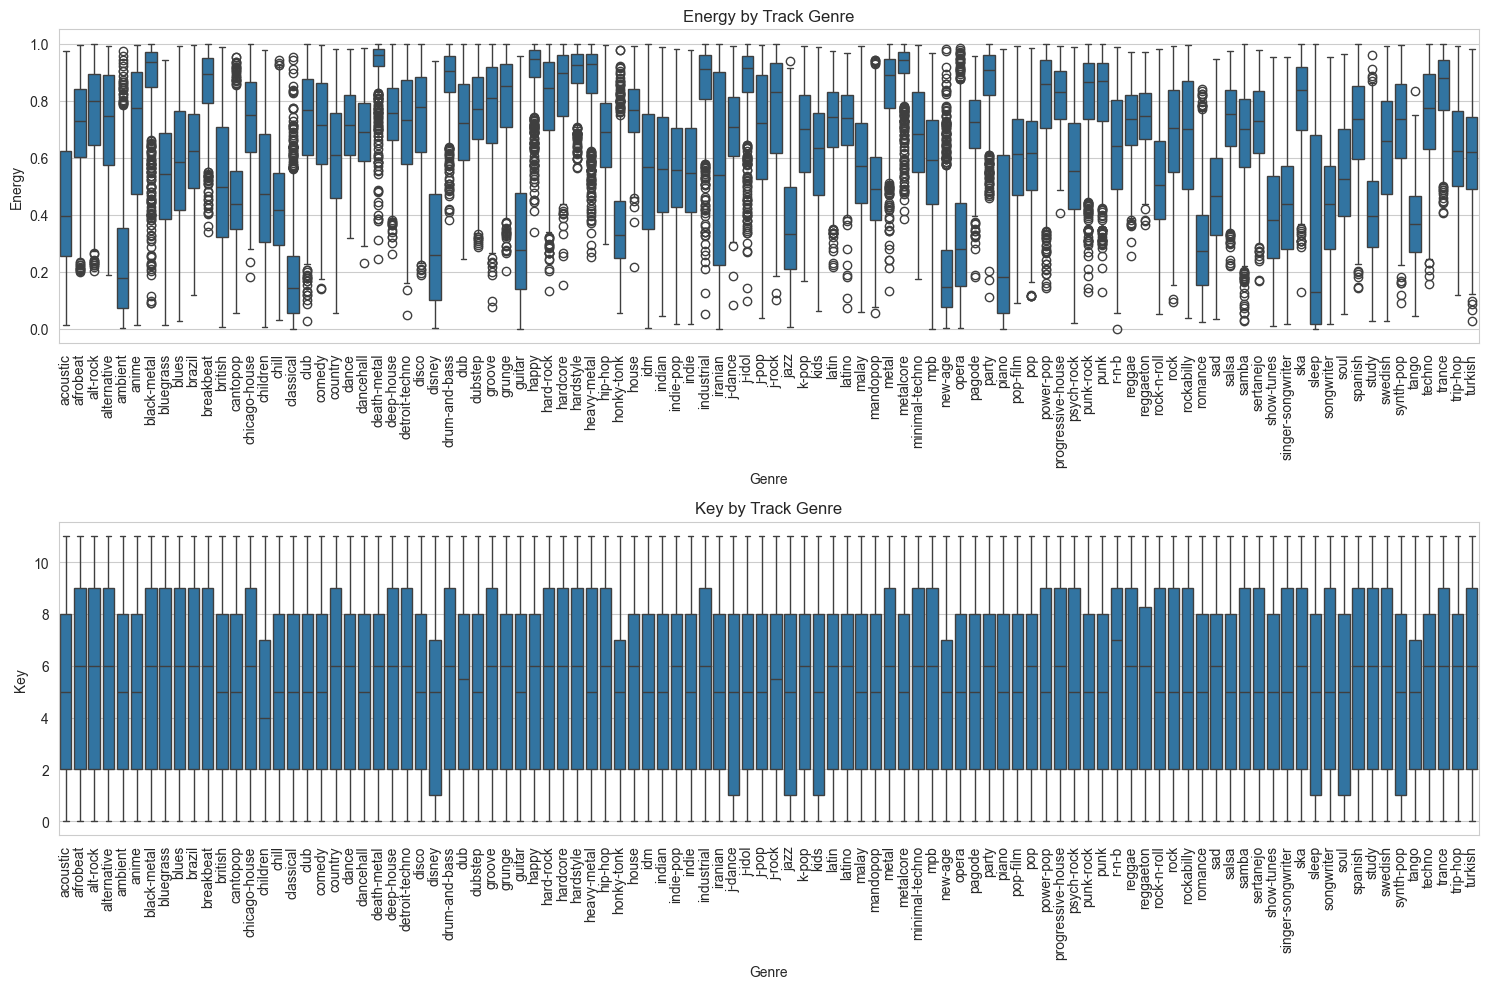

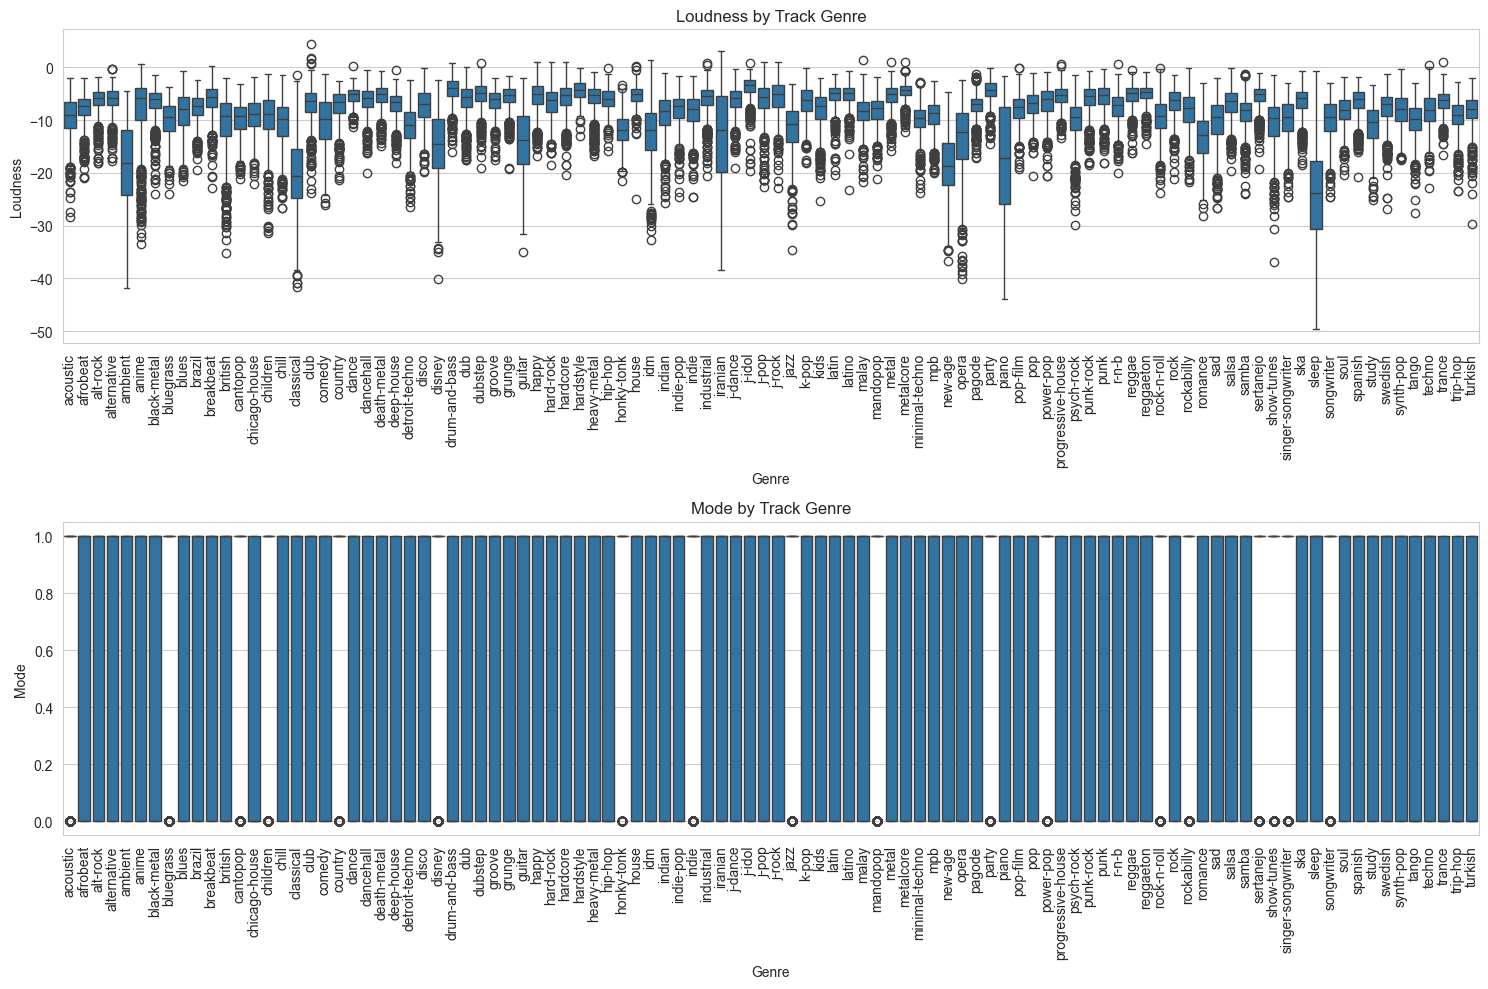

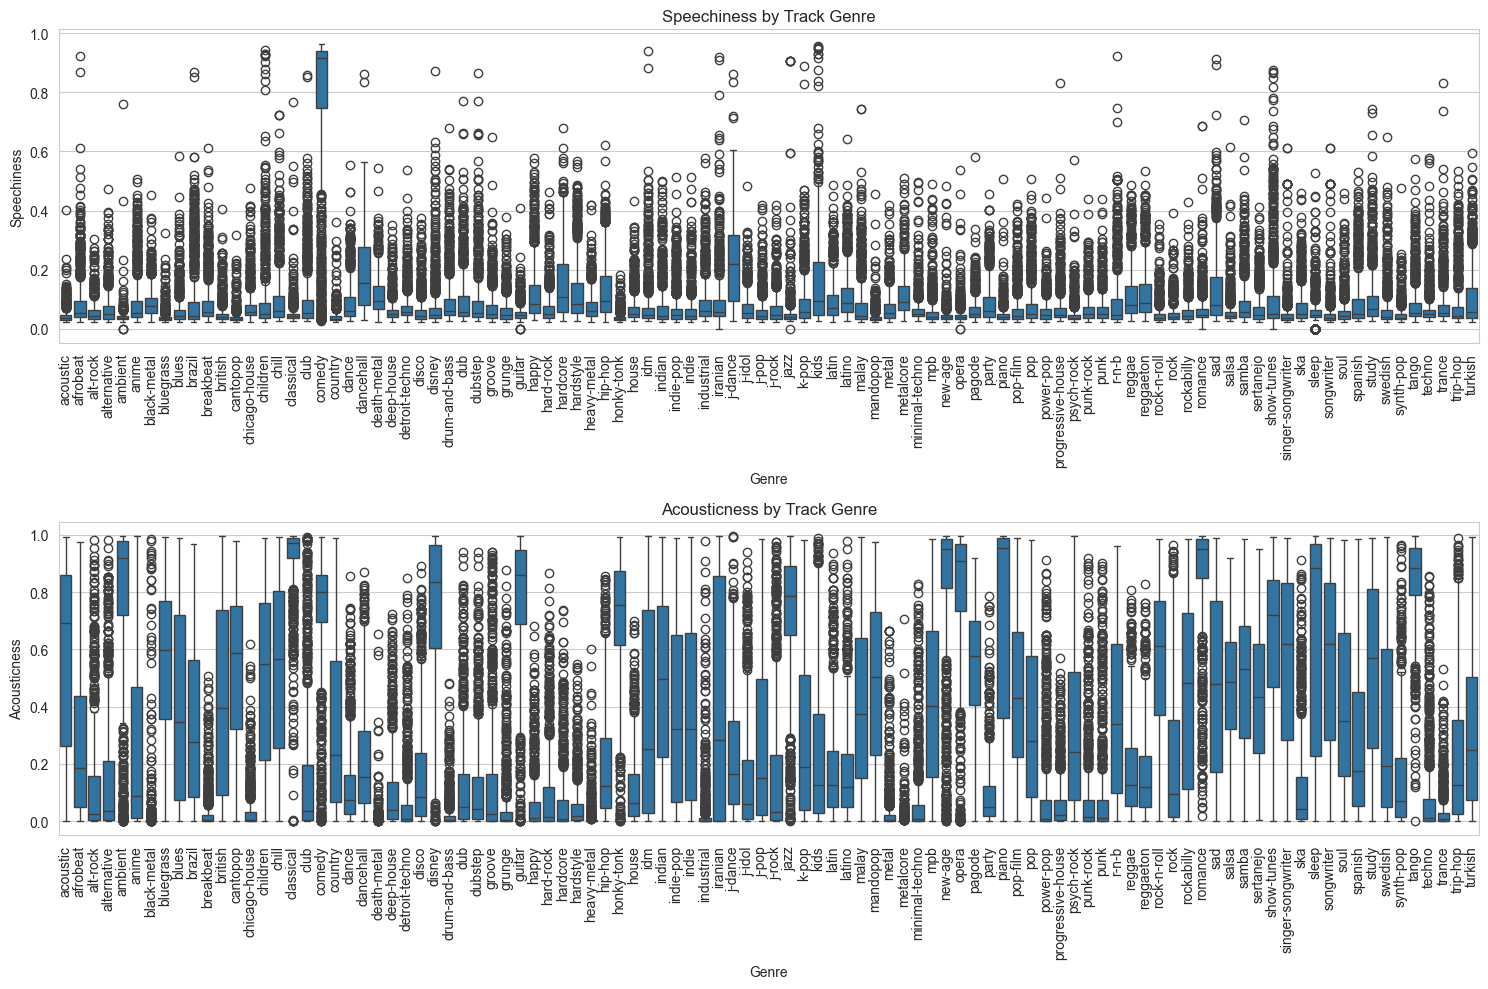

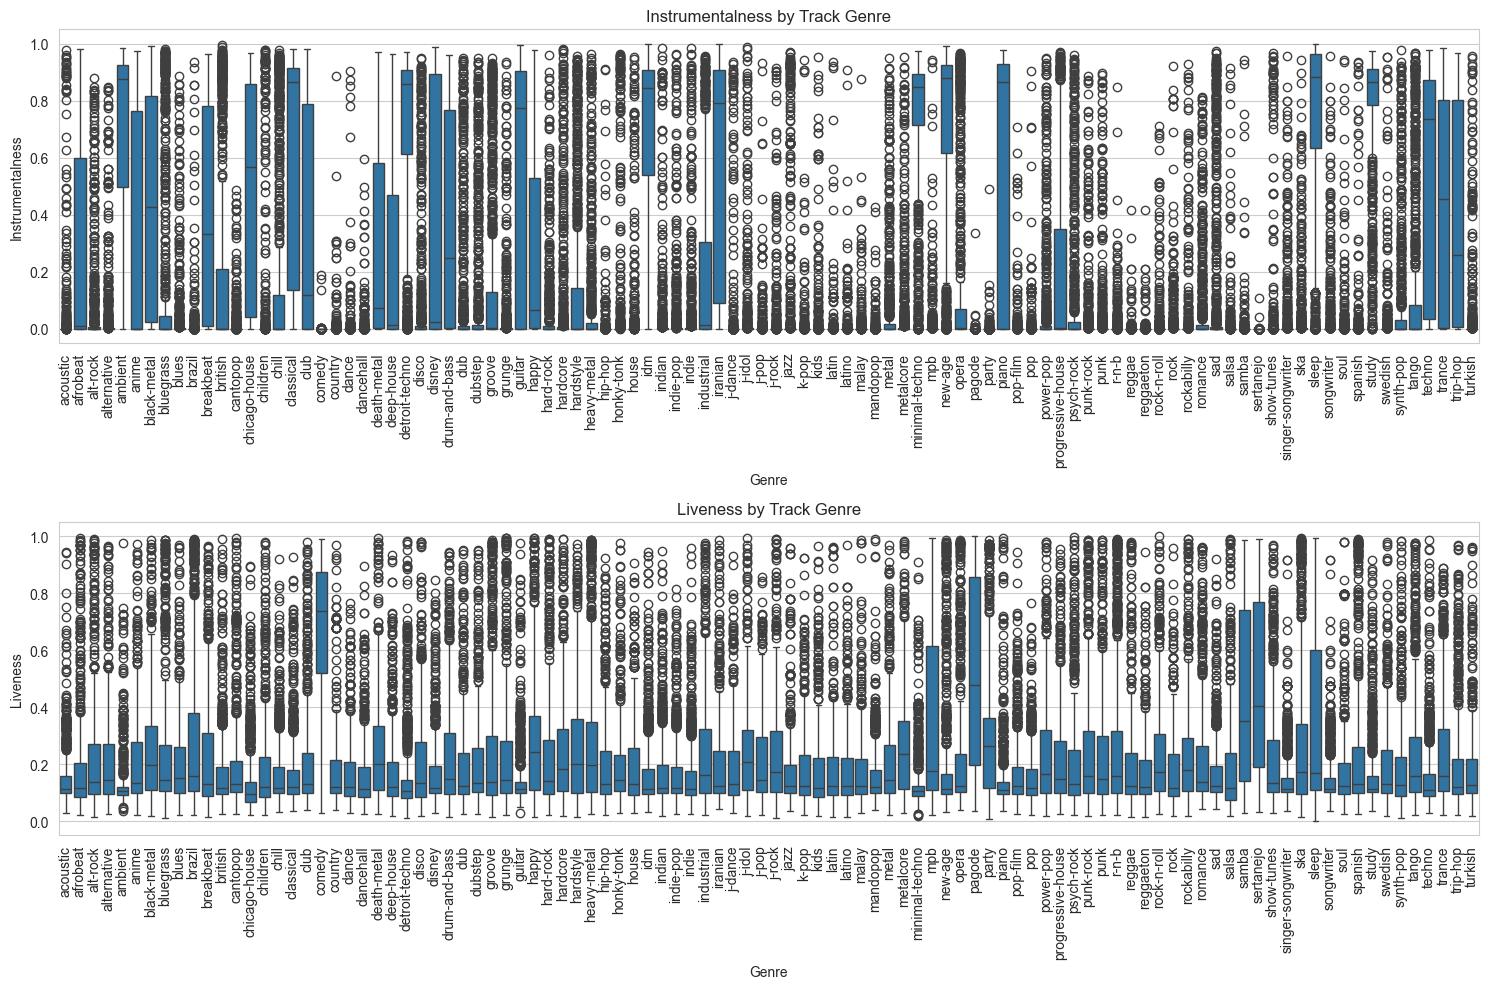

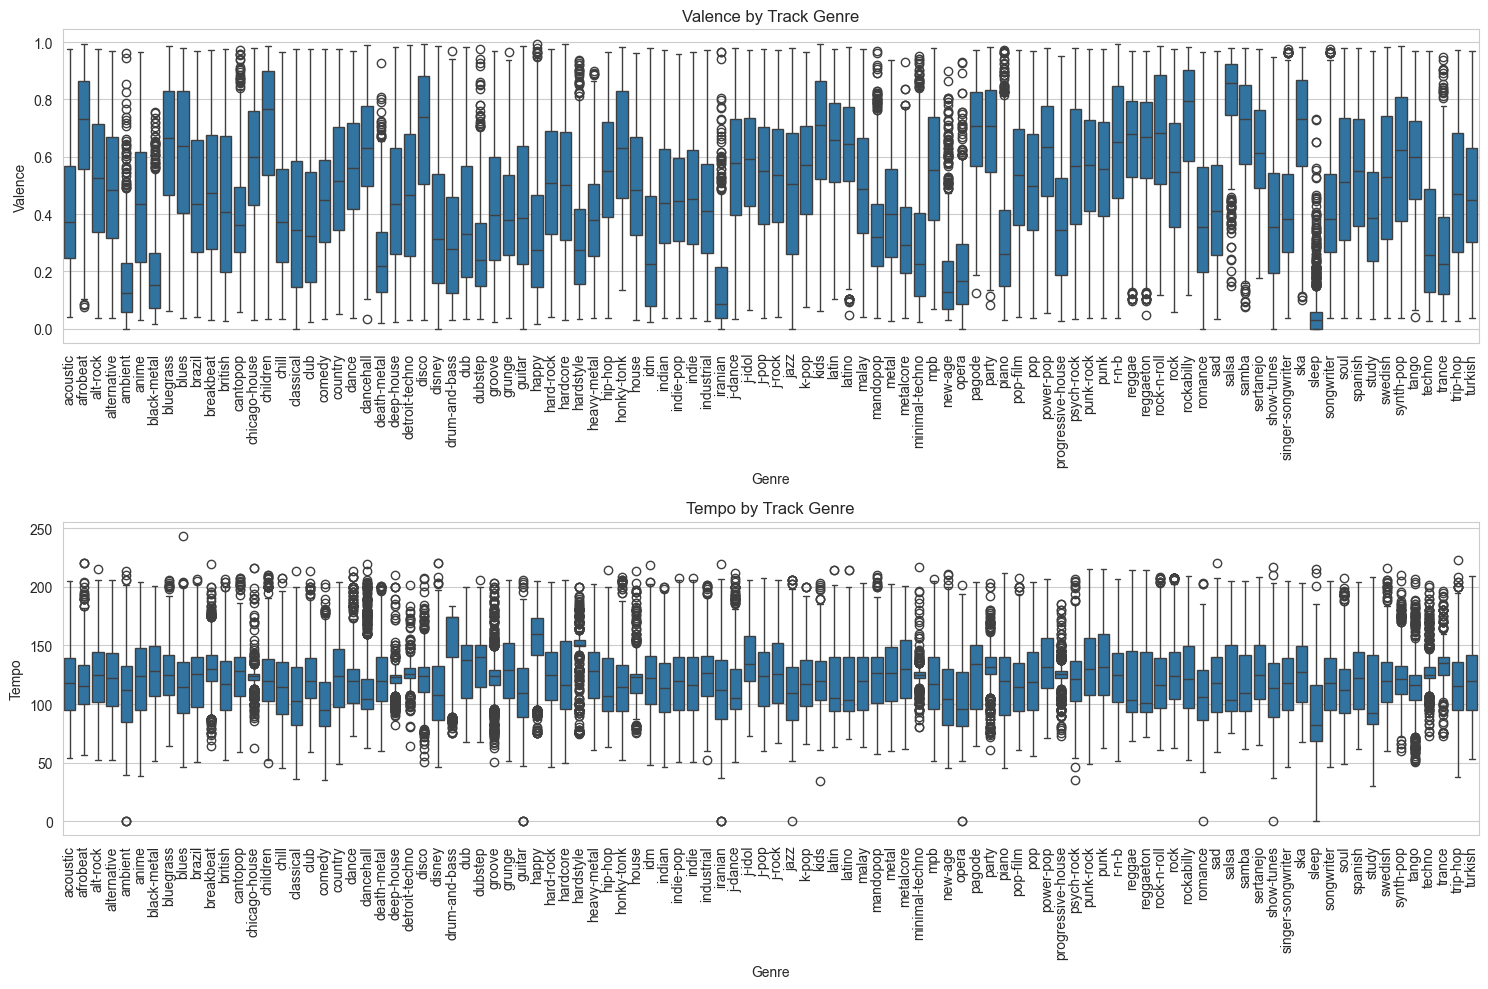

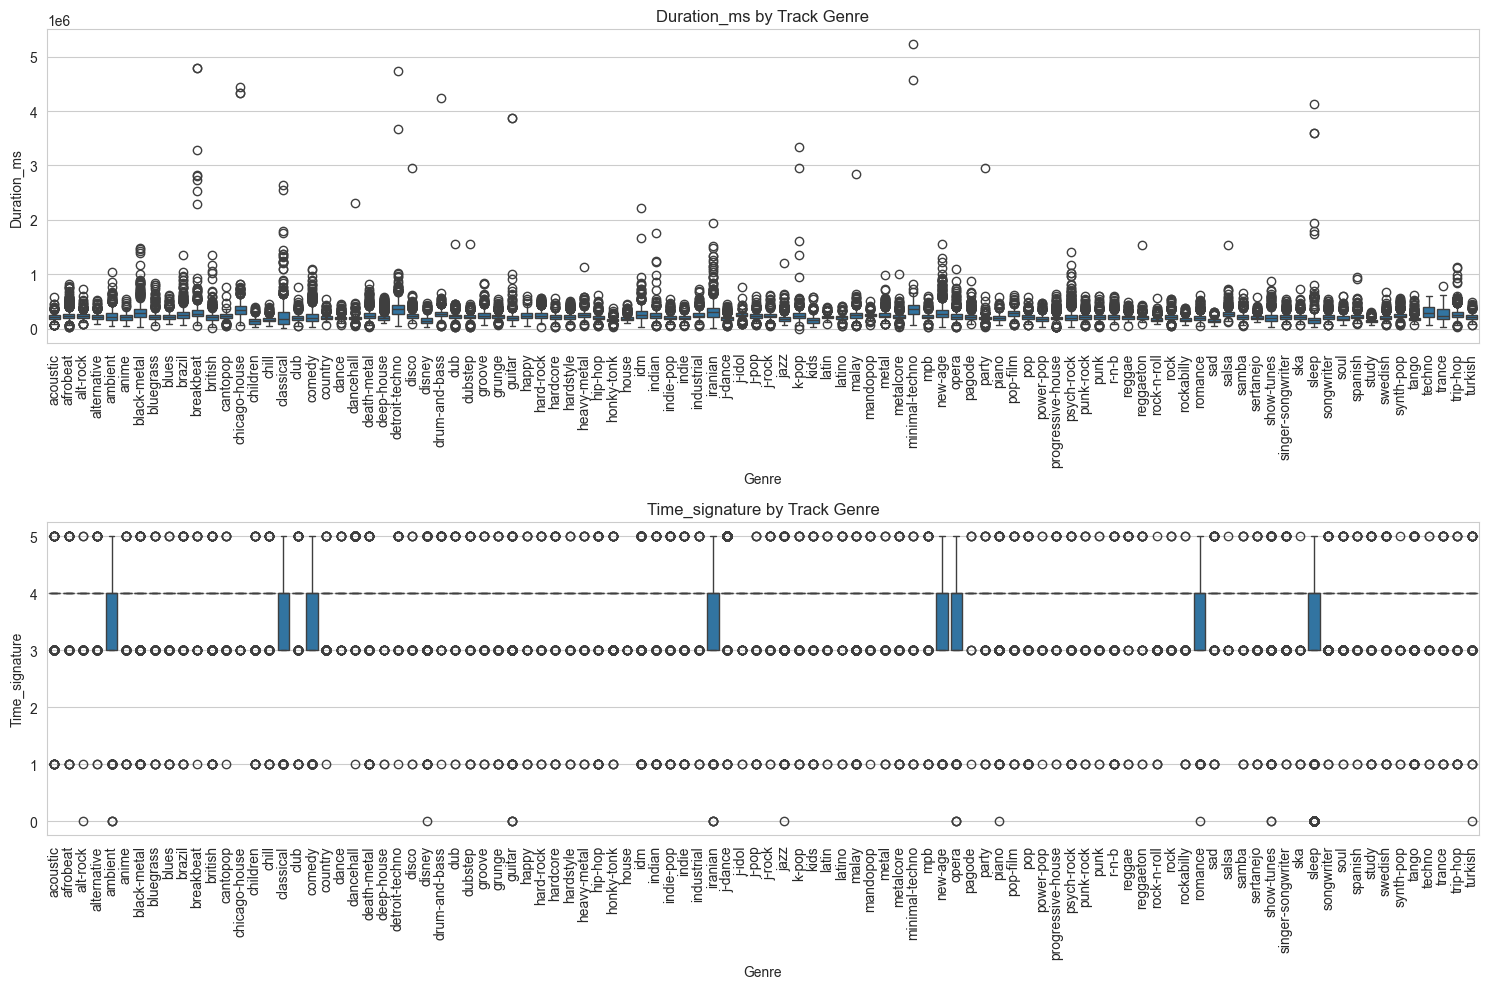

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical features excluding 'year'
numerical_features = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
    'valence', 'tempo', 'duration_ms', 'time_signature'
]

# Filter to top 100 genres for clarity
top_genres = df['track_genre'].value_counts().nlargest(100).index
filtered_df = df[df['track_genre'].isin(top_genres)]

# Iterate through the features in pairs
for i in range(0, len(numerical_features), 2):
    plt.figure(figsize=(15, 10))  # Increase figure size

    # First subplot
    plt.subplot(2, 1, 1)
    sns.boxplot(x='track_genre', y=numerical_features[i], data=filtered_df)
    plt.title(f'{numerical_features[i].capitalize()} by Track Genre')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.xlabel('Genre')
    plt.ylabel(numerical_features[i].capitalize())

    # Check if there's a second feature for this subplot pair
    if i + 1 < len(numerical_features):
        # Second subplot
        plt.subplot(2, 1, 2)
        sns.boxplot(x='track_genre', y=numerical_features[i + 1], data=filtered_df)
        plt.title(f'{numerical_features[i + 1].capitalize()} by Track Genre')
        plt.xticks(rotation=90)
        plt.xlabel('Genre')
        plt.ylabel(numerical_features[i + 1].capitalize())

    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()  # Show the plot and pause execution until it is closed


### Preliminary Analysis Overview

The visualizations presented above, such as the box plots for popularity and danceability across different music genres, are intended to provide a preliminary understanding of the dataset's structure and the relationships between track characteristics and genres. These plots are crucial for identifying trends and outliers, understanding the distribution of important features across genres, and setting a foundation for deeper analyses.

#### Moving Forward: Detailed Analytical Approach

While these initial insights are valuable, they represent just the beginning of our analytical journey. As we progress, especially into the development of predictive models, we will dive deeper into the nuances of how different features interact with `track_genre`. This will involve:

1.  **Detailed Statistical Analyses**: More rigorous statistical tests will be applied to discern the significance and strength of relationships between features and genres.
    
2.  **Feature Engineering**: Based on insights from our exploratory data analysis (EDA), we will engineer new features that better capture the complexities of musical tracks which could be crucial for predicting genres.
    
3.  **Model-Specific Analyses**: Different features may have varying levels of importance depending on the model used. For example, linear models may interpret features differently from tree-based models. We will explore these differences to tailor our feature selection and tuning accordingly.
    
4.  **Cross-Feature Interactions**: We will explore potential interactions between features that could be predictive of genre but are not immediately apparent from univariate or simple bivariate analyses.
    
5.  **Iterative Modeling**: Building predictive models is an iterative process. We will continually refine our models based on performance metrics, incorporating more complex interactions and transformations of features as needed.
    
6.  **Validation and Testing**: The models will be rigorously tested and validated using unseen data, ensuring that our conclusions are robust and generalizable across different subsets of data.
    

#### Conclusion

The current visualizations are illustrative and serve as a snapshot of our dataset's broader trends. As we refine our models and delve deeper into the data, we expect to uncover more specific and actionable insights that will guide the development of genre classification algorithms. 

In [27]:
# Assuming df is your DataFrame and filename is the name of the CSV file
cd.to_csv('Dataset/dataset_1.csv', index=False)

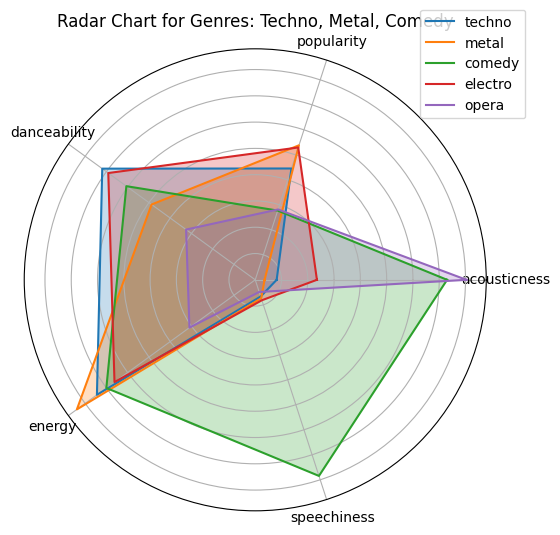

In [11]:
cd = pd.read_csv('Dataset/dataset_1.csv')

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded in the environment
# Normalize the relevant columns
attributes = ['acousticness', 'popularity', 'danceability', 'energy', 'speechiness']
genres = ['techno', 'metal', 'comedy','electro','opera']

# Filter the dataframe for the selected genres
df_filtered = cd[cd['track_genre'].isin(genres)]

# Normalize the selected columns
scaler = MinMaxScaler()
df_normalized = df_filtered.copy()
df_normalized[attributes] = scaler.fit_transform(df_filtered[attributes])

# Prepare data for radar chart
def get_genre_data(genre):
    return df_normalized[df_normalized['track_genre'] == genre][attributes].mean().tolist()

genre_data = {genre: get_genre_data(genre) for genre in genres}

# Radar chart
categories = attributes
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for genre, data in genre_data.items():
    data += data[:1]  # Complete the loop for the radar chart
    ax.plot(angles, data, label=genre)
    ax.fill(angles, data, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Radar Chart for Genres: Techno, Metal, Comedy')
plt.show()
